# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
 
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

cities_data_df = pd.DataFrame(cities)
cities_data_df.columns = ['City']
cities_data_df.head()

column_names = ["City","Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
cities_df = pd.DataFrame(columns=column_names)
cities_df.head()


row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_data_df.iterrows():
    target_city = row["City"]
    target_url = url + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
         
        cities_df.at[index, "City"]= city_data["name"]
        cities_df.at[index, "Country"] = city_data["sys"]["country"]
        cities_df.at[index, "Temperature (F)"] = city_data["main"]["temp"]
        cities_df.at[index, "Latitude"] = city_data["coord"]["lat"]
        cities_df.at[index, "Longitude"] = city_data["coord"]["lon"]
        cities_df.at[index, "Humidity (%)"] = city_data["main"]["humidity"]
        cities_df.at[index, "Cloudiness (%)"] = city_data["clouds"]["all"]
        cities_df.at[index, "Wind Speed (mph)"] = city_data["wind"]["speed"]
        
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1


Beginning Data Retrieval
------------------------
Proceesing: City #  1  |  Vaini IN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=vaini
------------------------
Proceesing: City #  2  |  Mesetas CO
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=mesetas
------------------------
Proceesing: City #  3  |  Rikitea PF
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=rikitea
------------------------
Proceesing: City #  4  |  Punta Arenas CL
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=punta+arenas
------------------------
Proceesing: City #  5  |  Butaritari KI
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=butaritari
------------------------
Proceesing: City #  6  |  Atuona PF
http://api.openweathermap.org/data/2.

------------------------
Proceesing: City #  47  |  Jamestown AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=jamestown
------------------------
Proceesing: City #  48  |  Pangnirtung CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=pangnirtung
------------------------
Proceesing: City #  49  |  Mar del Plata AR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=mar+del+plata
------------------------
Proceesing: City #  50  |  Fairbanks US
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=fairbanks
------------------------
Proceesing: City #  51  |  Lata IN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=lata
City not found, skipping...
------------------------
Proceesing: City #  52  |  Kampene CD
http://api.openwe

------------------------
Proceesing: City #  93  |  Atasu KZ
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=atasu
------------------------
Proceesing: City #  94  |  Tuatapere NZ
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=tuatapere
------------------------
Proceesing: City #  95  |  Kalmunai LK
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=kalmunai
------------------------
Proceesing: City #  96  |  San Antonio Huista GT
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=san+antonio+huista
------------------------
Proceesing: City #  97  |  Hobyo SO
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=hobyo
City not found, skipping...
------------------------
Proceesing: City #  98  |  Faanui PF
http://api.openweath

------------------------
Proceesing: City #  138  |  Terrace CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=terrace
------------------------
Proceesing: City #  139  |  Geraldton CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=geraldton
City not found, skipping...
------------------------
Proceesing: City #  140  |  Mayo CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=mayo
------------------------
Proceesing: City #  141  |  La Spezia IT
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=la+spezia
------------------------
Proceesing: City #  142  |  Tynda RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=tynda
------------------------
Proceesing: City #  143  |  Codrington AU
http://api.openweathermap.org/da

Proceesing: City #  184  |  Pouebo NC
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=pouebo
------------------------
Proceesing: City #  185  |  Rawson AR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=rawson
------------------------
Proceesing: City #  186  |  Shache CN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=shache
------------------------
Proceesing: City #  187  |  Talara PE
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=talara
------------------------
Proceesing: City #  188  |  Strezhevoy RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=strezhevoy
------------------------
Proceesing: City #  189  |  Airai TL
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4a

------------------------
Proceesing: City #  231  |  San Jeronimo PE
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=san+jeronimo
------------------------
Proceesing: City #  232  |  Madang PG
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=madang
------------------------
Proceesing: City #  233  |  Coroata BR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=coroata
------------------------
Proceesing: City #  234  |  Tres Arroyos AR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=tres+arroyos
------------------------
Proceesing: City #  235  |  Nhulunbuy AU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=nhulunbuy
------------------------
Proceesing: City #  236  |  Liuhe CN
http://api.openweathermap.org/data/2.5/we

------------------------
Proceesing: City #  278  |  Bama CN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=bama
------------------------
Proceesing: City #  279  |  Camacha PT
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=camacha
------------------------
Proceesing: City #  280  |  Dunedin NZ
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=dunedin
------------------------
Proceesing: City #  281  |  Okha RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=okha
------------------------
Proceesing: City #  282  |  Baryshivka UA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=baryshivka
------------------------
Proceesing: City #  283  |  Ustyuzhna RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

------------------------
Proceesing: City #  324  |  La Colorada VE
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=la+colorada
------------------------
Proceesing: City #  325  |  Beaverlodge CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=beaverlodge
------------------------
Proceesing: City #  326  |  Monopoli IT
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=monopoli
------------------------
Proceesing: City #  327  |  Itarema BR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=itarema
------------------------
Proceesing: City #  328  |  Paso de los Toros UY
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=paso+de+los+toros
------------------------
Proceesing: City #  329  |  Bethel US
http://api.openweatherma

------------------------
Proceesing: City #  369  |  Carndonagh IE
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=carndonagh
------------------------
Proceesing: City #  370  |  Olinda EC
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=olinda
------------------------
Proceesing: City #  371  |  Erenhot CN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=erenhot
------------------------
Proceesing: City #  372  |  Ust-Karsk RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=ust-karsk
------------------------
Proceesing: City #  373  |  Komsomolskiy RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=komsomolskiy
------------------------
Proceesing: City #  374  |  Port Blair IN
http://api.openweathermap.org/data/2.5/w

------------------------
Proceesing: City #  416  |  Katsuura JP
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=katsuura
------------------------
Proceesing: City #  417  |  Apatou SR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=apatou
------------------------
Proceesing: City #  418  |  Teguise ES
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=teguise
------------------------
Proceesing: City #  419  |  Dingle PH
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=dingle
------------------------
Proceesing: City #  420  |  Luderitz NA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=luderitz
------------------------
Proceesing: City #  421  |  Sorong ID
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

------------------------
Proceesing: City #  463  |  Vila Franca do Campo PT
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=vila+franca+do+campo
------------------------
Proceesing: City #  464  |  Zhangye CN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=zhangye
------------------------
Proceesing: City #  465  |  Barra Patuca HN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=barra+patuca
------------------------
Proceesing: City #  466  |  Yumen CN
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=yumen
------------------------
Proceesing: City #  467  |  Evensk RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=evensk
City not found, skipping...
------------------------
Proceesing: City #  468  |  Verkhoyansk RU

------------------------
Proceesing: City #  509  |  Khatanga RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=khatanga
------------------------
Proceesing: City #  510  |  Ekhabi RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=ekhabi
------------------------
Proceesing: City #  511  |  Pekan Nenas MY
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=pekan+nenas
------------------------
Proceesing: City #  512  |  Grindavik IS
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=grindavik
------------------------
Proceesing: City #  513  |  Sao Joao da Barra BR
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=sao+joao+da+barra
------------------------
Proceesing: City #  514  |  Quelimane MZ
http://api.openweathermap.o

------------------------
Proceesing: City #  556  |  Aklavik CA
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=aklavik
------------------------
Proceesing: City #  557  |  Badiraguato MX
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=badiraguato
------------------------
Proceesing: City #  558  |  Cayenne GF
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=cayenne
------------------------
Proceesing: City #  559  |  Danilov RU
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=danilov
------------------------
Proceesing: City #  560  |  Mindelo PT
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99b9554f98bbe165167b4afcf8fbcdb4&q=mindelo
------------------------
Proceesing: City #  561  |  Cidreira BR
http://api.openweathermap.org/data/2.5/weather?units

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:

cities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Vaini,IN,61.13,15.34,74.49,96,36,5.53
1,Mesetas,CO,83.99,3.38,-74.04,52,32,2.62
2,Rikitea,PF,80.43,-23.12,-134.97,100,24,13.91
3,Punta Arenas,CL,53.6,-53.16,-70.91,58,75,26.4
4,Butaritari,KI,83.36,3.07,172.79,100,44,12.01


In [9]:
cities_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

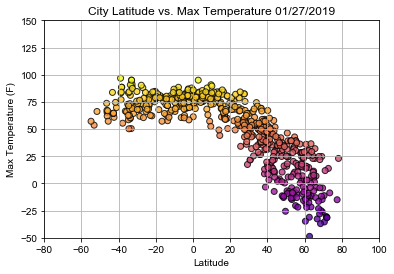

In [10]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Temperature (F)"], c=cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='plasma', alpha=0.8, label="City")


plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-50, 150])


plt.savefig("output_analysis/Latitude_Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

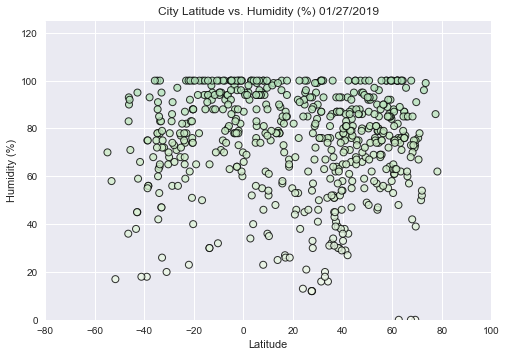

In [11]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Humidity (%)"], c=cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 125])

plt.savefig("output_analysis/Latitude_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

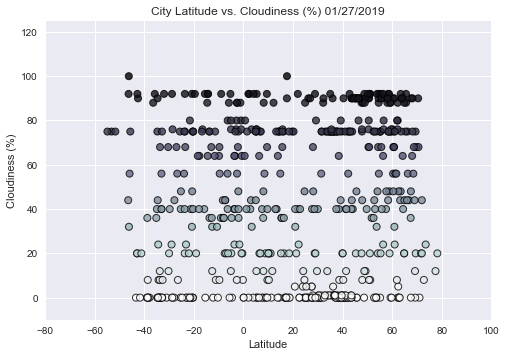

In [12]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Cloudiness (%)"], c=cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")


plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

plt.savefig("output_analysis/Latitude_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

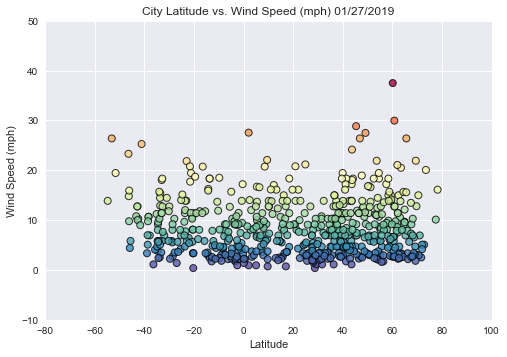

In [13]:
plt.scatter(cities_df["Latitude"], 
            cities_df["Wind Speed (mph)"], c=cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")


plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])


plt.savefig("output_analysis/Latitude_Wind_Speed.png")

plt.show()